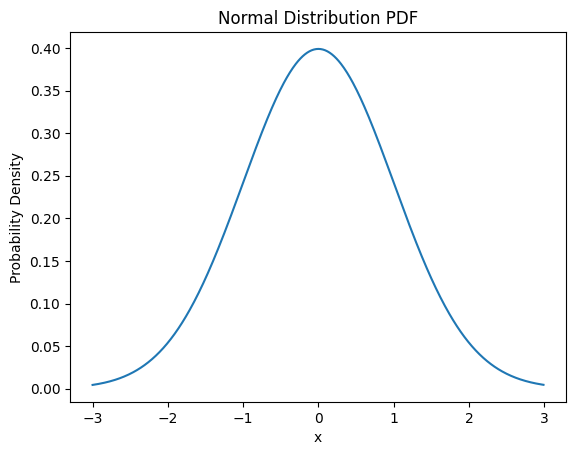

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm

# Define the distribution parameters
sample_space = arange(-3, 3, 0.01)
mean = 0
std_dev = 1

# Calculate the PDF
pdf = norm.pdf(sample_space, mean, std_dev)

# Plot
pyplot.plot(sample_space, pdf)
pyplot.title('Normal Distribution PDF')
pyplot.xlabel('x')
pyplot.ylabel('Probability Density')
pyplot.show()

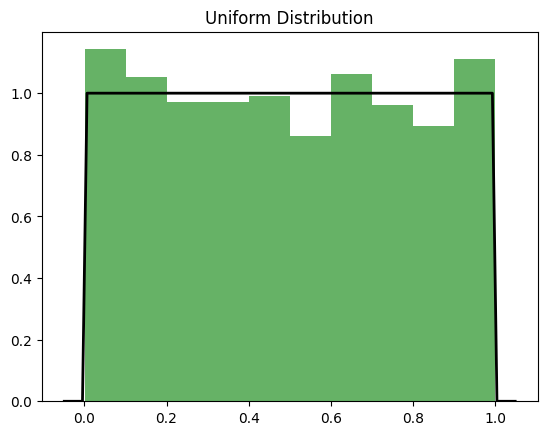

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt # Import the pyplot module
import numpy as np

# Generate data from a uniform distribution
data = uniform.rvs(loc=0, scale=1, size=1000)

# Plot the histogram of the data
plt.hist(data, bins=10, density=True,
alpha=0.6, color='g')

# Plot the probability density function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = uniform.pdf(x, loc=0, scale=1)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Uniform Distribution')
plt.show()

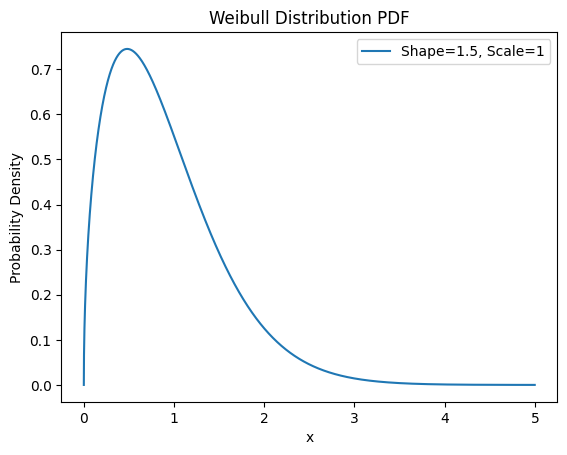

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import weibull_min
# Define the distribution parameters
shape = 1.5  # Shape parameter (c)
scale = 1    # Scale parameter (λ)
# Define the sample space
sample_space = arange(0, 5, 0.001)
# Calculate the PDF
pdf = weibull_min.pdf(sample_space,
c=shape, scale=scale)
# Plot
pyplot.plot(sample_space, pdf,
label=f'Shape={shape}, Scale={scale}')
pyplot.title('Weibull Distribution PDF')
pyplot.xlabel('x')
pyplot.ylabel('Probability Density')
pyplot.legend()
pyplot.show()


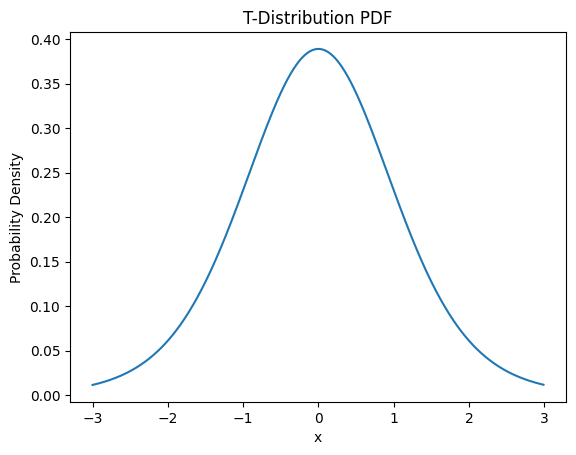

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import t


# Define the distribution parameters
sample_space = arange(-3, 3, 0.01)
dof = 10


# Calculate the PDF
pdf = t.pdf(sample_space, dof)


# Plot
pyplot.plot(sample_space, pdf)
pyplot.title('T-Distribution PDF')
pyplot.xlabel('x')
pyplot.ylabel('Probability Density')
pyplot.show()


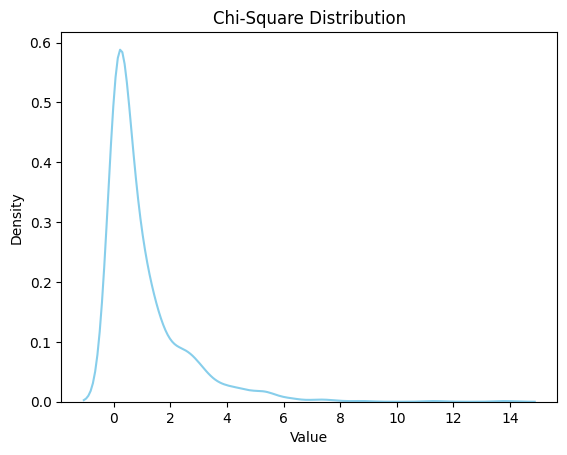

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate chi-square data
data = np.random.chisquare(df=1, size=1000)


# Plot density using seaborn
sns.kdeplot(data, color='skyblue')
plt.title('Chi-Square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


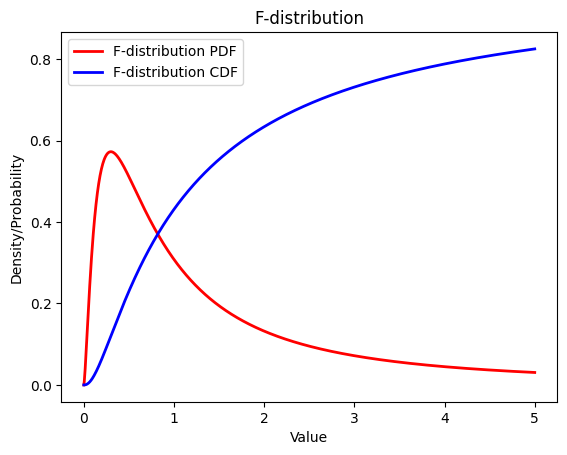

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
# Parameters for the F-distribution
dof_num = 5  # degrees of freedom for the numerator
dof_den = 2  # degrees of freedom for the denominator
# Generate the x values
x = np.linspace(0, 5, 1000)
# Calculate the PDF
pdf = f.pdf(x, dof_num, dof_den)
# Calculate the CDF
cdf = f.cdf(x, dof_num, dof_den)
# Plotting the PDF
plt.plot(x, pdf, 'r-', lw=2,
label='F-distribution PDF')
# Plotting the CDF
plt.plot(x, cdf, 'b-', lw=2,
label='F-distribution CDF')
# Adding labels and legend
plt.xlabel('Value')
plt.ylabel('Density/Probability')
plt.title('F-distribution')
plt.legend()
# Display the plot
plt.show()


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def identify_distribution(data):
    distributions = {
        "Normal": stats.norm,
        "T-Distribution": stats.t,
        "Lognormal": stats.lognorm,
        "F-Distribution": stats.f,
        "Chi-Square": stats.chi2,
        "Weibull": stats.weibull_min
    }

    results = {}
    fitted_params = {}

    # Fit data to each distribution and perform K-S test
    for dist_name, dist in distributions.items():
        params = dist.fit(data)
        D, p_value = stats.kstest(data, dist.cdf, args=params)
        results[dist_name] = p_value
        fitted_params[dist_name] = params

    # Identify the best fitting distribution
    best_fit = max(results, key=results.get)
    return best_fit, results, fitted_params

# Generate random data for testing
data = np.random.normal(0, 1, 1000)

# Identify the distribution
best_fit, results, fitted_params = identify_distribution(data)
print(f"Best fitting distribution: {best_fit}")
print("Goodness of Fit test p-values:")
for dist, p_value in results.items():
    print(f"{dist}: {p_value}")

# Plot the best fitting distribution
distributions = {
    "Normal": stats.norm,
    "T-Distribution": stats.t,
    "Uniform": stats.uniform,
    "F-Distribution": stats.f,
    "Chi-Square": stats.chi2,
    "Weibull": stats.weibull_min
}



Best fitting distribution: Chi-Square
Goodness of Fit test p-values:
Normal: 0.5094035157907906
T-Distribution: 0.5112554164548258
Lognormal: 0.6278407761057367
F-Distribution: 3.988734203356158e-235
Chi-Square: 0.7908960322522959
Weibull: 0.2635958023625782


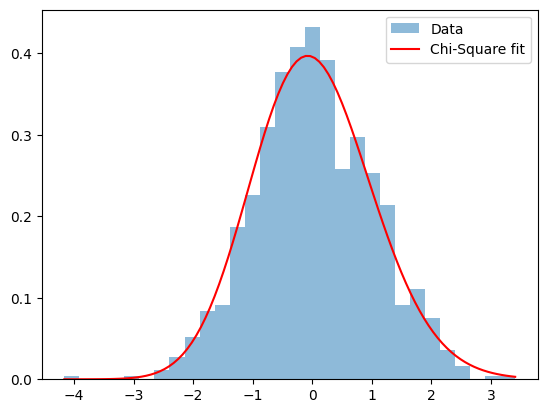

In [ ]:
best_dist = distributions[best_fit]
params = fitted_params[best_fit]
# Plotting the data and best fit distribution
x = np.linspace(min(data), max(data), 100)
pdf_fitted = best_dist.pdf(x, *params)

plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf_fitted, 'r-', label=f'{best_fit} fit')
plt.legend()
plt.show()